In [90]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as ss

"""
CDF - Using Different Continuous Function to generate the distribution
"""

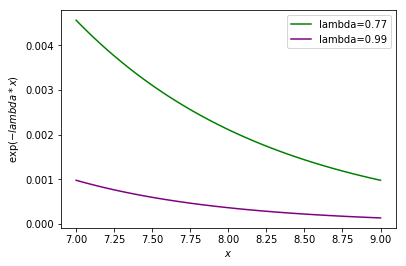

In [59]:
# Continuous Function 1 - Exponential Function: CDF(x) = 1-exp(-lambda*x)
## Complementary CDF (CCDF): CCDF(x) = exp(-lambda*x) 

lambda1 = 0.77
lambda2 = 0.99
x = np.linspace(7, 9, 100)  # generate 100 evenly spaced number between 7 & 9
y1 = np.exp(-lambda1*x)
y2 = np.exp(-lambda2*x)

plt.figure()
plt.plot(x, y1, c='green', label='lambda=0.77')
plt.plot(x, y2, c='purple', label='lambda=0.99')
plt.xlabel('$x$')
plt.ylabel('$\exp(-lambda*x)$')
plt.legend()
plt.show()

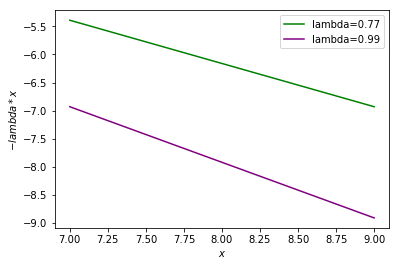

In [61]:
# If we take log of y in CCDF, we should be able to get linear line, because ln(y) = -lambda*x
## The plot here is to prove we can get linear lines
logy1 = [math.log(elem) for elem in y1]
logy2 = [math.log(elem) for elem in y2]

plt.figure()
plt.plot(x, logy1, c='green', label='lambda=0.77')
plt.plot(x, logy2, c='purple', label='lambda=0.99')
plt.xlabel('$x$')
plt.ylabel('$-lambda*x$')
plt.legend()
plt.show()

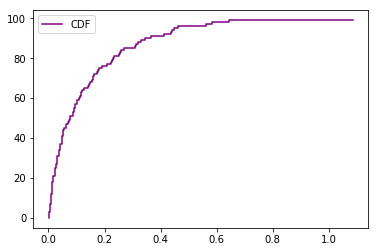

In [83]:
# Python random expovariate() generates numbers that are exponential distributed
random.seed(410)
cdf = [random.expovariate(7) for r in range(100)]  # lambda=7 here
sorted_data1 = np.sort(cdf)
plt.step(sorted_data1, np.arange(sorted_data1.size), c='purple', label='CDF')
plt.legend()
plt.show()

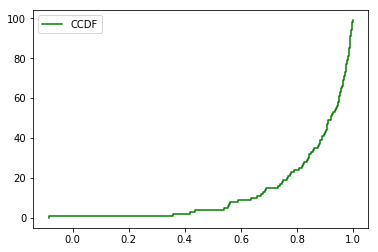

In [84]:
random.seed(410)
ccdf = [-random.expovariate(7)+1 for r in range(100)]  # lambda=7 here
sorted_data2 = np.sort(ccdf)
plt.step(sorted_data2, np.arange(sorted_data2.size), c='green', label='CCDF')
plt.legend()
plt.show()

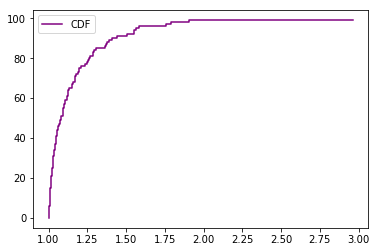

In [85]:
# Pareto Distributon
# CDF(x) = 1- pow(x/xm, -alpha)
# CCDF(x) = pow(x/xm, -alpha)

## In python paretovariate, you can set alpha, xm=1 by default. You can use x/xm if your xm is not 1
random.seed(410)
cdf = [random.paretovariate(7) for r in range(100)]  # alpha=7 here
sorted_data1 = np.sort(cdf)
plt.step(sorted_data1, np.arange(sorted_data1.size), c='purple', label='CDF')
plt.legend()
plt.show()

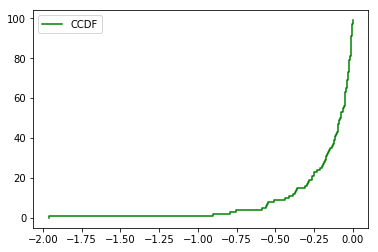

In [86]:
random.seed(410)
ccdf = [-random.paretovariate(7)+1 for r in range(100)]  # alpha=7 here
sorted_data2 = np.sort(ccdf)
plt.step(sorted_data2, np.arange(sorted_data2.size), c='green', label='CCDF')
plt.legend()
plt.show()

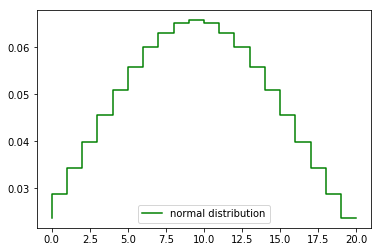

In [101]:
# Normal Distribution
x = np.arange(-10, 11)
xU, xL = x + 0.5, x - 0.5 
## scale is standard deviation, loc is mean (0 by default)
prob = ss.norm.cdf(xU, scale = 7) - ss.norm.cdf(xL, scale = 7)  
prob = prob / prob.sum()  # normalize so that the sum is 1

sorted_data = np.sort(prob)
plt.step(np.arange(prob.size), prob, c='green', label='normal distribution')
plt.legend()
plt.show()

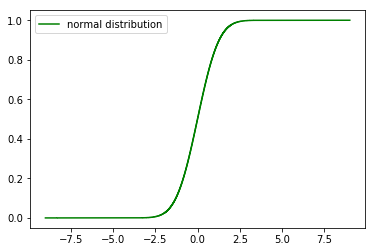

In [106]:
# CDF with a normal distribution
from scipy.special import erf

high = 9   # how many standard deviation above the mean
low = -high  # how many standard deviation below the mean
digits=2
n = (high - low) * 10**digits + 1
xs = np.linspace(low, high, n)
ps = (erf(xs / math.sqrt(2.0)) + 1) / 2

plt.step(xs, ps, c='green', label='normal distribution')
plt.legend()
plt.show()

# reference: http://greenteapress.com/thinkstats/erf.py